# **Password Strength Checker**

In [6]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [7]:
def getToken(input_string):
    tokens=[]
    for i in input_string:
        tokens.append(i)
    return tokens

In [8]:
#Importing and Reading the dataset
data=pd.read_csv("data.csv", error_bad_lines=False)
data=pd.DataFrame(data)
data.fillna(' ', inplace=True)
password=np.array(data)

C:\Users\DELL\AppData\Local\Temp\ipykernel_8236\3096557782.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data=pd.read_csv("data.csv", error_bad_lines=False)


Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

In [9]:
data=data.dropna()
data['strength']=data['strength'].map({0:'Weak',
                                       1:'Medium',
                                       2:'Strong'})
data.sample()

,password,strength
426201,wael22845345,Medium


In [11]:
#Random shuffling of data for robustness
random.shuffle(password)

y=[d[1] for d in password]
allpasswords=[d[0] for d in password]

In [12]:
password

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['q8gsts', 0],
       ['R7vY71TA1NwfGe8d', 2],
       ['curpksg16', 1]], dtype=object)

In [13]:
#Vectorizing
vectorizer=TfidfVectorizer(tokenizer=getToken)

In [14]:
X=vectorizer.fit_transform(allpasswords)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [15]:
#Splitting the data for training and then testing the model
X_train, X_test, Y_train, Y_test=train_test_split(X, y, test_size=0.20, random_state=42)

In [16]:
#Fitting the data
lgs = LogisticRegression(penalty='l2', multi_class='ovr')
lgs.fit(X_train, Y_train)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

In [17]:
#Making predictions based on the trained data
lgs_predict=lgs.predict(X_test)

#Testing the accuracy of the model
print("Test Accuracy: {}%".format(round(lgs.score(X_test,Y_test)*100,2)))

Test Accuracy: 81.09%


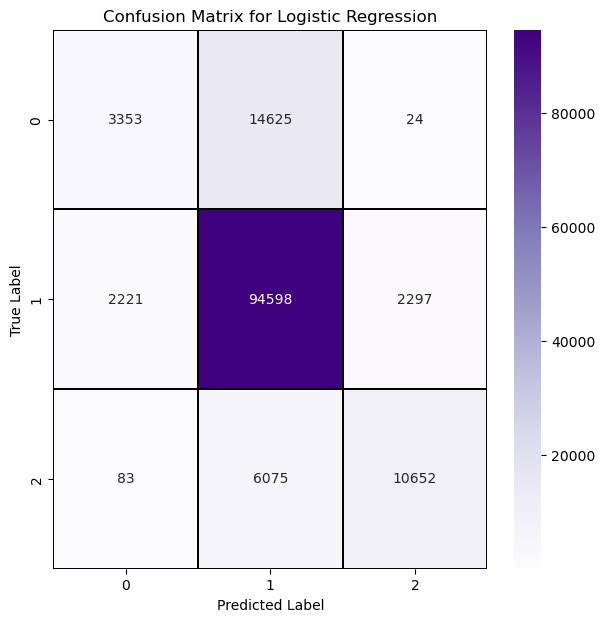

In [18]:
#Confusion matrix for evaluating the performance of model
cm=confusion_matrix(Y_test, lgs_predict)
xlabel=["0", "1", "2"]
ylabel=["0", "1", "2"]

f, ax=plt.subplots(figsize=(7,7), facecolor='w')
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor='black', fmt='.0f', ax=ax, cmap="Purples")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [19]:
#Custom testing
def predict_password_strength():
     label_map = {0: 'Weak', 1: 'Medium', 2: 'Strong'}
     while True:
        new_password = input("Enter a new password to predict its strength (or 'quit' to exit): ")
        
        if new_password.lower() == 'quit':
            break
        X_predict=vectorizer.transform([new_password])
        Y_predict=lgs.predict(X_predict)
        predicted_strength = label_map[Y_predict[0]] if Y_predict[0] in label_map else 'Unknown'
        print(f"Predicted strength for the entered password '{new_password}': {predicted_strength}")

# Call the function to predict strength for a new password entered by the user
predict_password_strength()


Predicted strength for the entered password '123456': Medium
Predicted strength for the entered password 'hidgw4422!!': Medium
Predicted strength for the entered password 'H1h2h3!!': Medium
Predicted strength for the entered password '': Weak
